<a href="https://colab.research.google.com/github/badrinarayanan02/machine_learning/blob/main/simpleRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
data = pd.read_csv('/content/computers - computers.csv')
data

,Units,Minutes
0,1,23
1,2,29
2,3,49
3,4,64
4,4,74
5,5,87
6,6,96
7,6,97
8,7,109
9,8,119


Calculating mean

In [ ]:
mean_value = data['Minutes'].mean()
mean_value

97.21428571428571

Plotting the actual time taken and mean

Text(0, 0.5, 'Minutes')

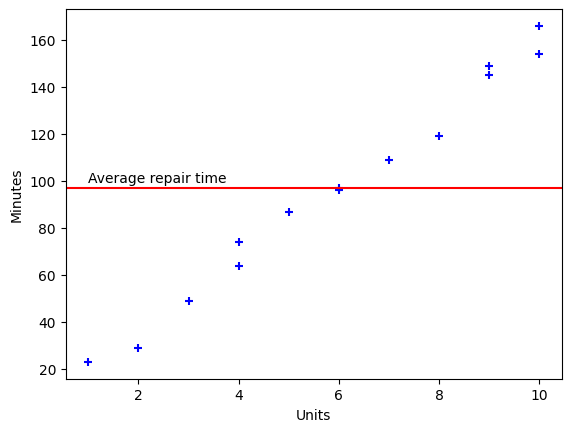

In [42]:
plt.scatter(data['Units'],data['Minutes'],color='blue',marker='+')
plt.axhline(y=mean_value,color='red')
plt.annotate("Average repair time", xy=(1,mean_value+2.5))
plt.xlabel("Units")
plt.ylabel("Minutes")

In [ ]:
minutes_model1 = data['Minutes'].mean()
minutes_model2= 10+12*data['Units']
minutes_model3 = 6+18*data['Units']

print(minutes_model1)
print(minutes_model2)
print(minutes_model3)

97.21428571428571
0      22
1      34
2      46
3      58
4      58
5      70
6      82
7      82
8      94
9     106
10    118
11    118
12    130
13    130
Name: Units, dtype: int64
0      24
1      42
2      60
3      78
4      78
5      96
6     114
7     114
8     132
9     150
10    168
11    168
12    186
13    186
Name: Units, dtype: int64


In [ ]:
data['min_model1'] = minutes_model1
data['min_model2'] = minutes_model2
data['min_model3'] = minutes_model3
data.head()

,Units,Minutes,min_model1,min_model2,min_model3
0,1,23,97.214286,22,24
1,2,29,97.214286,34,42
2,3,49,97.214286,46,60
3,4,64,97.214286,58,78
4,4,74,97.214286,58,78


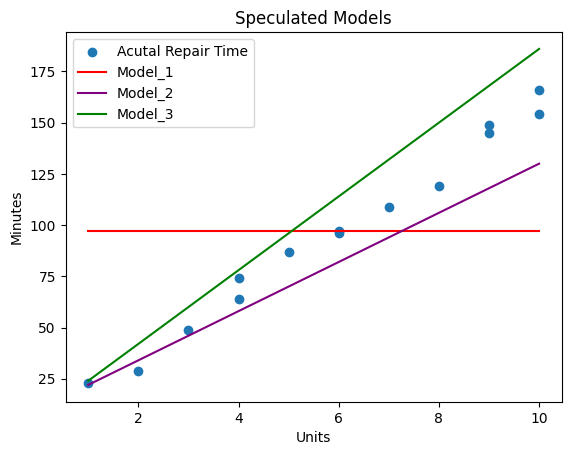

In [ ]:
fig, ax = plt.subplots()

#plotting actual minutes

ax.scatter(x='Units',y='Minutes',data = data,label='Acutal Repair Time')
ax.plot(data['Units'],data['min_model1'],color='red',label='Model_1')
ax.plot(data['Units'],data['min_model2'],color='purple',label='Model_2')
ax.plot(data['Units'],data['min_model3'],color='green',label='Model_3')

ax.set_ylabel('Minutes')
ax.set_xlabel('Units')
ax.set_title("Speculated Models")
ax.legend()

Analyzing the speculated models

In [ ]:
model1_obs = pd.DataFrame({
    'Units':data['Units'],
    'Actual Time':data['Minutes'],
    'Predicted Time': data['min_model1'],
    'Error':(data.min_model1 - data.Minutes)
})
model1_obs

,Units,Actual Time,Predicted Time,Error
0,1,23,97.214286,74.214286
1,2,29,97.214286,68.214286
2,3,49,97.214286,48.214286
3,4,64,97.214286,33.214286
4,4,74,97.214286,23.214286
5,5,87,97.214286,10.214286
6,6,96,97.214286,1.214286
7,6,97,97.214286,0.214286
8,7,109,97.214286,-11.785714
9,8,119,97.214286,-21.785714


In [ ]:
sum(model1_obs.Error**2)

27768.357142857145

Analyzing Model 2

In [ ]:
model2_obs = pd.DataFrame({
    'Units':data['Units'],
    'Actual Time':data['Minutes'],
    'Predicted Time': data['min_model2'],
    'Error':(data.min_model2 - data.Minutes)
})
model2_obs

,Units,Actual Time,Predicted Time,Error
0,1,23,22,-1
1,2,29,34,5
2,3,49,46,-3
3,4,64,58,-6
4,4,74,58,-16
5,5,87,70,-17
6,6,96,82,-14
7,6,97,82,-15
8,7,109,94,-15
9,8,119,106,-13


Error Value of model2

In [ ]:
sum(model2_obs.Error**2)

4993

Analyzing Model 3

In [39]:
model3_obs = pd.DataFrame({
    'Units':data['Units'],
    'Actual Time':data['Minutes'],
    'Predicted Time': data['min_model3'],
    'Error':(data.min_model3 - data.Minutes)
})
model3_obs

,Units,Actual Time,Predicted Time,Error
0,1,23,24,1
1,2,29,42,13
2,3,49,60,11
3,4,64,78,14
4,4,74,78,4
5,5,87,96,9
6,6,96,114,18
7,6,97,114,17
8,7,109,132,23
9,8,119,150,31


Error value of model 3

In [40]:
sum(model3_obs.Error**2)

5001

Finding the slope and intercept

In [ ]:
x=data.Units
y=data.Minutes
xy = x*y
n = len(data)

xmean = data.Units.mean()
ymean= data.Minutes.mean()
numerator=xy.sum()-n*xmean*ymean
denominator = (x**2).sum() - n * (xmean**2)
m = numerator/denominator
c = ymean - (m*xmean)
print('intercept-c:',c,'coefficient-m:',m)

intercept-c: 4.161654135338296 coefficient-m: 15.508771929824569


In [ ]:
# Estimating time using intercept and coefficient of the best fit model

min_best_fit_model = c + m * data.Units
data['min_best_fit_model'] = min_best_fit_model
data[['Units','Minutes','min_best_fit_model']]

,Units,Minutes,min_best_fit_model
0,1,23,19.670426
1,2,29,35.179198
2,3,49,50.687970
3,4,64,66.196742
4,4,74,66.196742
5,5,87,81.705514
6,6,96,97.214286
7,6,97,97.214286
8,7,109,112.723058
9,8,119,128.231830


Text(0.5, 1.0, 'Best Fit Model line')

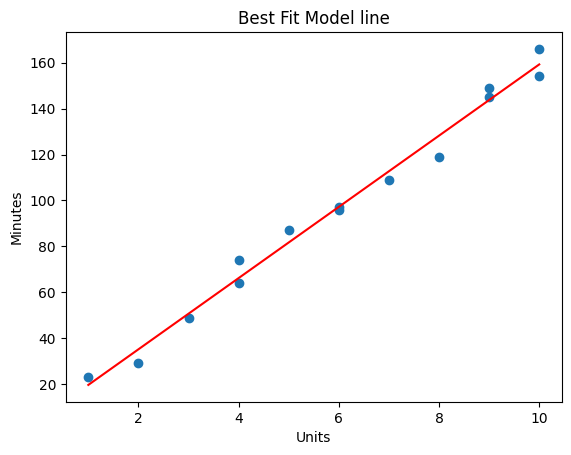

In [ ]:
fig,ax = plt.subplots()

ax.scatter(x='Units',y = 'Minutes', data = data)
ax.plot(data.Units,data.min_best_fit_model,color='red')
ax.set_ylabel('Minutes')
ax.set_xlabel('Units')
ax.set_title('Best Fit Model line')


Best Fit Model

In [ ]:
best_fit_model_obs = pd.DataFrame({
    'Units':data['Units'],
    'Actual Time':data.Minutes,
    'Predicted Time': data.min_best_fit_model,
    'Error':(data.min_best_fit_model - data.Minutes)
})
best_fit_model_obs

,Units,Actual Time,Predicted Time,Error
0,1,23,19.670426,-3.329574
1,2,29,35.179198,6.179198
2,3,49,50.687970,1.687970
3,4,64,66.196742,2.196742
4,4,74,66.196742,-7.803258
5,5,87,81.705514,-5.294486
6,6,96,97.214286,1.214286
7,6,97,97.214286,0.214286
8,7,109,112.723058,3.723058
9,8,119,128.231830,9.231830


Error value of best fit model

In [ ]:
sum(best_fit_model_obs.Error**2)

348.848370927318

**Inference:** This shows that the best fit model has a lowest error when compared to other 3 models

# Applying Linear Regression

In [36]:
X = data[['Units']]
y = data['Minutes']

In [ ]:
model = LinearRegression()

In [37]:
model.fit(X,y)

LinearRegression()

In [38]:
print("Intercepts: ", model.intercept_)
print("Coefficients: ", model.coef_)

Intercepts:  4.161654135338296
Coefficients:  [15.50877193]
